# Customer Analytics
**An International E-Commerce company wants to start their operations in India, they want to do a Sentiment analysis(Positive
or Negative) of their competitors such as Amazon, Flipkart, Snapdeal**<br>
1. Extract twitter data for each of the competitors
2. Text preprocessing
2. Perform positive and negative tweet analysis.
3. Create a word-cloud
4. Analyse for which products what are the sentiments.

# Import Libraries

In [1]:
import pandas as pd
%pylab inline
import warnings
warnings.filterwarnings('ignore')
import tweepy
from tweepy import OAuthHandler
import string
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
from wordcloud import WordCloud

Populating the interactive namespace from numpy and matplotlib


# Scraping Tweets 

In [2]:
class TwitterClient(object): 
    def __init__(self):
        # Access Credentials 
        consumer_key        = "xaX9uB2x3C3a8fWtD6NVlgoqy"
        consumer_secret     = "iUmFWaZcrqKyoS8zVivfMN2SgBc7kHCAvxFsGmzu5NBrqnUe71"
        access_token        = "1268782591815159809-tivP3RE48pFPsrGK94FitNAqX1ztpW"
        access_token_secret = "CfkeUcHKrtQRDq31YqJ5Iz5MY8CbYKot4t3jJXHcQ7dK0"
        try: 
            # OAuthHandler object 
            auth = OAuthHandler(consumer_key, consumer_secret) 
            # set access token and secret 
            auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets 
            self.api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            
        except tweepy.TweepError as e:
            print(f"Error: Twitter Authentication Failed - \n{str(e)}") 

    # Function to fetch tweets
    def get_tweets(self, query, maxTweets = 200): 
        # empty list to store parsed tweets 
        tweets = [] 
        sinceId = None
        max_id = -1
        tweetCount = 0
        tweetsPerQry = 100
        
        while tweetCount < maxTweets:
            try:
                if (max_id <= 0):
                    if (not sinceId):
                        new_tweets = self.api.search(q=query, count=tweetsPerQry, tweet_mode='extended', lang='en')
                    else:
                        new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                since_id=sinceId, tweet_mode='extended', lang='en')
                else:
                    if (not sinceId):
                        new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                max_id=str(max_id - 1), tweet_mode='extended', lang='en')
                    else:
                        new_tweets = self.api.search(q=query, count=tweetsPerQry,
                                                max_id=str(max_id - 1),
                                                since_id=sinceId, tweet_mode='extended', lang='en')
                if not new_tweets:
                    print("No more tweets found")
                    break
                    
                for tweet in new_tweets:
                    parsed_tweet = {} 
                    parsed_tweet['tweets'] = tweet.full_text 

                    # appending parsed tweet to tweets list 
                    if tweet.retweet_count > 0: 
                        # if tweet has retweets, ensure that it is appended only once 
                        if parsed_tweet not in tweets: 
                            tweets.append(parsed_tweet) 
                    else: 
                        tweets.append(parsed_tweet) 
                        
                tweetCount += len(new_tweets)
                print("Downloaded {0} tweets".format(tweetCount))
                max_id = new_tweets[-1].id

            except tweepy.TweepError as e:
                print("Tweepy error : " + str(e))
                break
        
        return pd.DataFrame(tweets)

**Tweets for Amazon**<br>
scraped tweets saved in "amazon_tweets.csv" file

In [28]:
twitter_client = TwitterClient()

# calling function to get tweets
tweets_df = twitter_client.get_tweets('AmazonIN', maxTweets=5000)
print(f'tweets_df Shape - {tweets_df.shape}')
print(tweets_df.head(5))

tweets_df.to_csv('amazon_tweets.csv')     # saving extracted tweets in a csv file.

tweets_df Shape - (3918, 1)
                                              tweets
0  @amazonIN 1 chat, 5 calls and 32 days. How man...
1  @AmazonHelp Hi Today is 26th Nov 2020 and stil...
2  @amazonIN A lovely story and a must-read book....
3  Amazing way to pack a kg of flour in such a hu...
4  @amazonIN @IndianOilcl This is the reality of ...


**Tweets for Flipkart**<br>
scraped tweets saved in "flipkart_tweets.csv" file

In [317]:
twitter_client = TwitterClient()

# calling function to get tweets
tweets_df = twitter_client.get_tweets('Flipkart', maxTweets=5000)
print(f'tweets_df Shape - {tweets_df.shape}')
print(tweets_df.head(5))

tweets_df.to_csv('flipkart_tweets.csv')     # saving extracted tweets in a csv file.

tweets_df Shape - (3383, 1)
                                              tweets
0               @motorolaindia @Flipkart Finally....
1  RT @IndiaPOCO: #BlackFriyay deal on a Thursday...
2  @Flipkart #flipkart is fake guys you can check...
3  @Flipkart @_sachinbansal @_Kalyan_K How many d...
4  @flipkartsupport you all are least concerned a...


**Tweets for Snapdeal**<br>
scraped tweets saved in "amazon_tweets.csv" file

In [319]:
twitter_client = TwitterClient()

# calling function to get tweets
tweets_df = twitter_client.get_tweets('snapdeal', maxTweets=5000)
print(f'tweets_df Shape - {tweets_df.shape}')
print(tweets_df.head(5))

tweets_df.to_csv('snapdeal_tweets.csv')     # saving extracted tweets in a csv file.

tweets_df Shape - (1064, 1)
                                              tweets
0  @Straigh89978260 Hi! Please " Private Message"...
1  RT @nvasudevaNaray2: @rvaidya2000 I am a start...
2  @nasscom @1kunalbahl @snapdeal @debjani_ghosh_...
3  @rvaidya2000 I am a startup garment manufactur...
4  @amazonIN @amazon @JeffBezos @flipkart @snapde...


# loading scraped tweets

In [3]:
amazon = pd.read_csv('amazon_tweets.csv')
flipkart = pd.read_csv('flipkart_tweets.csv')
snapdeal = pd.read_csv('snapdeal_tweets.csv')

In [5]:
# all the dataframes concatenated.

df = pd.concat([amazon, flipkart, snapdeal], axis=0, ignore_index=True)
print(df.shape)
df.head()

(8365, 2)


,Unnamed: 0,tweets
0,0,"@amazonIN 1 chat, 5 calls and 32 days. How man..."
1,1,@AmazonHelp Hi Today is 26th Nov 2020 and stil...
2,2,@amazonIN A lovely story and a must-read book....
3,3,Amazing way to pack a kg of flour in such a hu...
4,4,@amazonIN @IndianOilcl This is the reality of ...


In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)       # drop 'Unnamed: 0' column, no use.
df.columns = ['text']                             # renaming column {'tweets' : 'text'}

In [7]:
# shuffled dataset

df = df.sample(frac=1)
df.head()

,text
198,@AmazonHelp; @amazonIN; @JeffBezos; @PMOIndia;...
3208,RT @tedhiKhopdi: @amazonIN @amazon @AmazonHelp...
6545,@Flipkart @EcomExpress_Ofc why you have worst...
842,RT @deepikadhiman: @amazonIN Appario retail se...
6115,@Chandan88069835 @Microtek_india @VGuardOffici...


In [8]:
final_df = df.copy()      # copy

In [9]:
final_df.head()

,text
198,@AmazonHelp; @amazonIN; @JeffBezos; @PMOIndia;...
3208,RT @tedhiKhopdi: @amazonIN @amazon @AmazonHelp...
6545,@Flipkart @EcomExpress_Ofc why you have worst...
842,RT @deepikadhiman: @amazonIN Appario retail se...
6115,@Chandan88069835 @Microtek_india @VGuardOffici...


# Text preprocessing

**a) remove @name**<br>
we can see that almost every tweet have '@names', which is of no use, since it don't have any meaning, it needs to be removed.<br>
**remove** 'RT', '\n' keyword as they are appearing many times and have not significant use.

In [10]:
final_df['processed'] = final_df['text'].str.replace('@[^\s]+', "")

final_df['processed'] = final_df['processed'].str.replace('RT', "")
final_df['processed'] = final_df['processed'].str.replace('\n', "")
final_df.head()

,text,processed
198,@AmazonHelp; @amazonIN; @JeffBezos; @PMOIndia;...,A. ORDER PLACED23 August 2020ORDER # 405-...
3208,RT @tedhiKhopdi: @amazonIN @amazon @AmazonHelp...,You have now set an outstanding delivery...
6545,@Flipkart @EcomExpress_Ofc why you have worst...,why you have worst delivery service? Wait f...
842,RT @deepikadhiman: @amazonIN Appario retail se...,Appario retail seems to be a regular frauds...
6115,@Chandan88069835 @Microtek_india @VGuardOffici...,"Hi Chandan, we regret to hear about your ..."


**b) remove links**<br>
many tweets have various link, which is of no use.

In [11]:
final_df['processed'] = final_df['processed'].str.replace('https?:\/\/.*[\r\n]*', "")
final_df.head()

,text,processed
198,@AmazonHelp; @amazonIN; @JeffBezos; @PMOIndia;...,A. ORDER PLACED23 August 2020ORDER # 405-...
3208,RT @tedhiKhopdi: @amazonIN @amazon @AmazonHelp...,You have now set an outstanding delivery...
6545,@Flipkart @EcomExpress_Ofc why you have worst...,why you have worst delivery service? Wait f...
842,RT @deepikadhiman: @amazonIN Appario retail se...,Appario retail seems to be a regular frauds...
6115,@Chandan88069835 @Microtek_india @VGuardOffici...,"Hi Chandan, we regret to hear about your ..."


**c) remove tweets with empty text**

In [12]:
final_df = final_df[final_df['processed']!=""]

**d) drop duplicate tweets**

In [13]:
final_df.drop_duplicates(subset=['processed'], inplace=True, keep=False)

In [14]:
# resetting index
final_df.reset_index(inplace=True, drop=True )
final_df.head()

,text,processed
0,@AmazonHelp; @amazonIN; @JeffBezos; @PMOIndia;...,A. ORDER PLACED23 August 2020ORDER # 405-...
1,RT @tedhiKhopdi: @amazonIN @amazon @AmazonHelp...,You have now set an outstanding delivery...
2,@Flipkart @EcomExpress_Ofc why you have worst...,why you have worst delivery service? Wait f...
3,RT @deepikadhiman: @amazonIN Appario retail se...,Appario retail seems to be a regular frauds...
4,@ShashiTharoor @KS1729 @AlephBookCo @amazonIN ...,They r carriers &amp; suppliers of these...


**e) remove punctuations and numbers**

In [15]:
punc = string.punctuation+'0123456789'
final_df['processed'] = final_df['processed'].apply(lambda x: [w for w in x if w not in punc])
final_df['processed'] = final_df['processed'].apply(lambda x: "".join(x))

final_df.head()

,text,processed
0,@AmazonHelp; @amazonIN; @JeffBezos; @PMOIndia;...,A ORDER PLACED August ORDER Return reque...
1,RT @tedhiKhopdi: @amazonIN @amazon @AmazonHelp...,You have now set an outstanding delivery...
2,@Flipkart @EcomExpress_Ofc why you have worst...,why you have worst delivery service Wait fo...
3,RT @deepikadhiman: @amazonIN Appario retail se...,Appario retail seems to be a regular frauds...
4,@ShashiTharoor @KS1729 @AlephBookCo @amazonIN ...,They r carriers amp suppliers of these n...


**f) remove emoji**

In [16]:
regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)


final_df['processed'] = [ regrex_pattern.sub(r'',x) for x in final_df['processed'] ]

**g) lower case**

In [17]:
final_df['processed'] = [ x.lower() for x in final_df['processed']]
final_df.head()

,text,processed
0,@AmazonHelp; @amazonIN; @JeffBezos; @PMOIndia;...,a order placed august order return reque...
1,RT @tedhiKhopdi: @amazonIN @amazon @AmazonHelp...,you have now set an outstanding delivery...
2,@Flipkart @EcomExpress_Ofc why you have worst...,why you have worst delivery service wait fo...
3,RT @deepikadhiman: @amazonIN Appario retail se...,appario retail seems to be a regular frauds...
4,@ShashiTharoor @KS1729 @AlephBookCo @amazonIN ...,they r carriers amp suppliers of these n...


**h) Tokenize**

In [18]:
final_df['processed'] = final_df['processed'].apply(lambda x: x.split() )
final_df.head()

,text,processed
0,@AmazonHelp; @amazonIN; @JeffBezos; @PMOIndia;...,"[a, order, placed, august, order, return, requ..."
1,RT @tedhiKhopdi: @amazonIN @amazon @AmazonHelp...,"[you, have, now, set, an, outstanding, deliver..."
2,@Flipkart @EcomExpress_Ofc why you have worst...,"[why, you, have, worst, delivery, service, wai..."
3,RT @deepikadhiman: @amazonIN Appario retail se...,"[appario, retail, seems, to, be, a, regular, f..."
4,@ShashiTharoor @KS1729 @AlephBookCo @amazonIN ...,"[they, r, carriers, amp, suppliers, of, these,..."


**i) remove Stopwords**


In [19]:
stopwords_list = stopwords.words('english')

In [20]:
final_df['processed'] = final_df['processed'].apply(lambda x: [w for w in x if w not in stopwords_list])
final_df.head()

,text,processed
0,@AmazonHelp; @amazonIN; @JeffBezos; @PMOIndia;...,"[order, placed, august, order, return, request..."
1,RT @tedhiKhopdi: @amazonIN @amazon @AmazonHelp...,"[set, outstanding, delivery, delay, standard, ..."
2,@Flipkart @EcomExpress_Ofc why you have worst...,"[worst, delivery, service, wait, delivery, sud..."
3,RT @deepikadhiman: @amazonIN Appario retail se...,"[appario, retail, seems, regular, fraudster, a..."
4,@ShashiTharoor @KS1729 @AlephBookCo @amazonIN ...,"[r, carriers, amp, suppliers, narcotics, kills..."


**j) remove extra small words**<br>
people might have used some short forms for words which have no proper meaning.

In [22]:
final_df['processed'] = final_df['processed'].apply(lambda x: [w for w in x if len(w)>2 ])

**k) Lemmatization**

In [23]:
final_df['processed'] = [ [Word(w).lemmatize('v') for w in x] for x in final_df['processed'] ]

final_df.head()

,text,processed
0,@AmazonHelp; @amazonIN; @JeffBezos; @PMOIndia;...,"[order, place, august, order, return, request,..."
1,RT @tedhiKhopdi: @amazonIN @amazon @AmazonHelp...,"[set, outstanding, delivery, delay, standard, ..."
2,@Flipkart @EcomExpress_Ofc why you have worst...,"[worst, delivery, service, wait, delivery, sud..."
3,RT @deepikadhiman: @amazonIN Appario retail se...,"[appario, retail, seem, regular, fraudster, ac..."
4,@ShashiTharoor @KS1729 @AlephBookCo @amazonIN ...,"[carriers, amp, suppliers, narcotics, kill, on..."


In [24]:
final_df['absolute_processed'] = final_df['processed'].apply(lambda x: " ".join(x) )

final_df.head()

,text,processed,absolute_processed
0,@AmazonHelp; @amazonIN; @JeffBezos; @PMOIndia;...,"[order, place, august, order, return, request,...",order place august order return request approv...
1,RT @tedhiKhopdi: @amazonIN @amazon @AmazonHelp...,"[set, outstanding, delivery, delay, standard, ...",set outstanding delivery delay standard prime ...
2,@Flipkart @EcomExpress_Ofc why you have worst...,"[worst, delivery, service, wait, delivery, sud...",worst delivery service wait delivery suddenly ...
3,RT @deepikadhiman: @amazonIN Appario retail se...,"[appario, retail, seem, regular, fraudster, ac...",appario retail seem regular fraudster action
4,@ShashiTharoor @KS1729 @AlephBookCo @amazonIN ...,"[carriers, amp, suppliers, narcotics, kill, on...",carriers amp suppliers narcotics kill ones bra...


# Sentiment analysis

In [25]:
final_df['sentiment'] = final_df['absolute_processed'].apply(lambda x: 'pos' if TextBlob(x).sentiment.polarity>=0 else 'neg')

final_df.head()

,text,processed,absolute_processed,sentiment
0,@AmazonHelp; @amazonIN; @JeffBezos; @PMOIndia;...,"[order, place, august, order, return, request,...",order place august order return request approv...,pos
1,RT @tedhiKhopdi: @amazonIN @amazon @AmazonHelp...,"[set, outstanding, delivery, delay, standard, ...",set outstanding delivery delay standard prime ...,pos
2,@Flipkart @EcomExpress_Ofc why you have worst...,"[worst, delivery, service, wait, delivery, sud...",worst delivery service wait delivery suddenly ...,neg
3,RT @deepikadhiman: @amazonIN Appario retail se...,"[appario, retail, seem, regular, fraudster, ac...",appario retail seem regular fraudster action,pos
4,@ShashiTharoor @KS1729 @AlephBookCo @amazonIN ...,"[carriers, amp, suppliers, narcotics, kill, on...",carriers amp suppliers narcotics kill ones bra...,neg


In [39]:
print('sentiments : \n', final_df['sentiment'].value_counts())

t = final_df['sentiment'].value_counts()
print(' \n\n {}% customers are unhappy '.format(t[1]/(t[0]+t[1]) *100) )

sentiments : 
 pos    5022
neg    1614
Name: sentiment, dtype: int64
 

 24.321880650994576% customers are unhappy 


**we see 24% customers of Amazon, flipkart, snapdeal are unhappy with them.<br>
for such e-commerce giants even if their 24% of customers are not satisfied with them. it leaves a big market for any other company to settle in easily.**

# Word Cloud

In [26]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21,
                          max_font_size=100, relative_scaling=0.5,
                          colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

**Wordcloud**

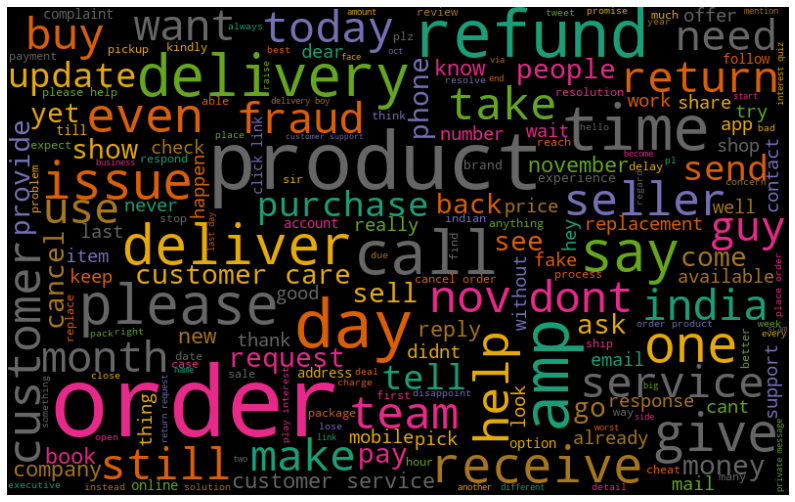

In [27]:
all_words = ' '.join([text for text in final_df['absolute_processed']])
all_words = [ word for word in all_words.split() if word not in ['amazon', 'flipkart','snapdeal'] ]
all_words = " ".join(all_words)

generate_wordcloud(all_words)

Most common words are 'service', 'order', 'product', 'delivery'

**Wordcloud for positive sentiment**

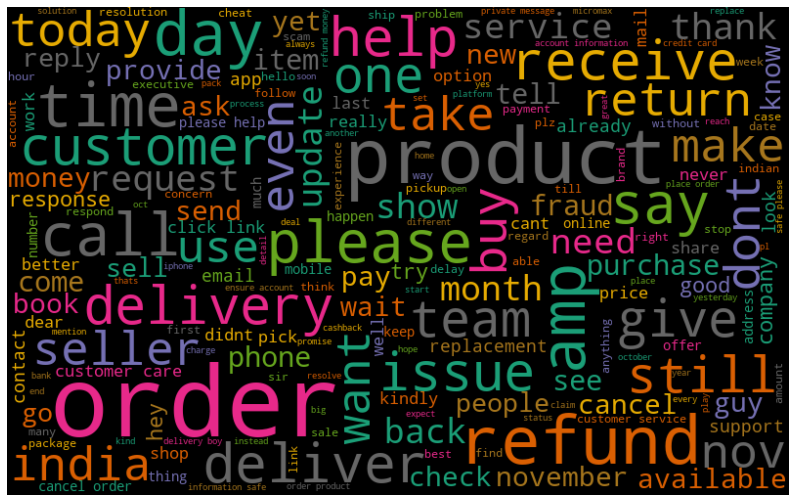

In [28]:
all_words = ' '.join([text for text in final_df['absolute_processed'][final_df.sentiment == 'pos']])
all_words = [ word for word in all_words.split() if word not in ['amazon', 'flipkart','snapdeal'] ]
all_words = " ".join(all_words)

generate_wordcloud(all_words)

for Sentiment = positive<br>
most common words are 'refund', 'return', 'customer',

**Wordcloud for negative sentiment**

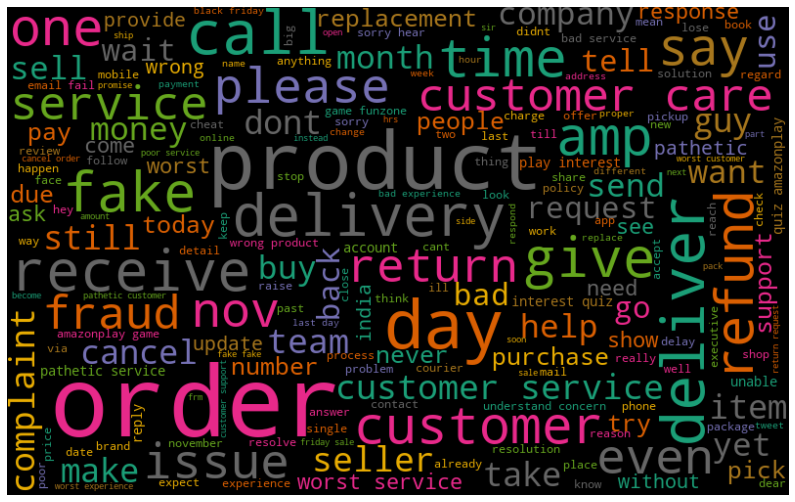

In [29]:
all_words = ' '.join([text for text in final_df['absolute_processed'][final_df.sentiment == 'neg']])
all_words = [ word for word in all_words.split() if word not in ['amazon', 'flipkart','snapdeal'] ]
all_words = " ".join(all_words)

generate_wordcloud(all_words)

for Sentiment = negative<br>
most common words are 'Fake', 'complaint', 'worst', 'pathetic', 'bad'

In [30]:
final_df.head()

,text,processed,absolute_processed,sentiment
0,@AmazonHelp; @amazonIN; @JeffBezos; @PMOIndia;...,"[order, place, august, order, return, request,...",order place august order return request approv...,pos
1,RT @tedhiKhopdi: @amazonIN @amazon @AmazonHelp...,"[set, outstanding, delivery, delay, standard, ...",set outstanding delivery delay standard prime ...,pos
2,@Flipkart @EcomExpress_Ofc why you have worst...,"[worst, delivery, service, wait, delivery, sud...",worst delivery service wait delivery suddenly ...,neg
3,RT @deepikadhiman: @amazonIN Appario retail se...,"[appario, retail, seem, regular, fraudster, ac...",appario retail seem regular fraudster action,pos
4,@ShashiTharoor @KS1729 @AlephBookCo @amazonIN ...,"[carriers, amp, suppliers, narcotics, kill, on...",carriers amp suppliers narcotics kill ones bra...,neg


# Product Sentiment Analysis

In [42]:
def product_sentiment(product):
    temp = pd.DataFrame()
    temp['is_{}'.format(product)] = pd.Series([ 0 if x.find(product)== -1 else 1 for x in final_df['absolute_processed'] ])
    new = pd.concat([final_df['sentiment'], temp], axis=1)
    print('sentiment for {}'.format(product) )
    ans = new[new['is_{}'.format(product)]==1]['sentiment'].value_counts()
#     print(ans,'\n')
    return ans

sentiment for mobile


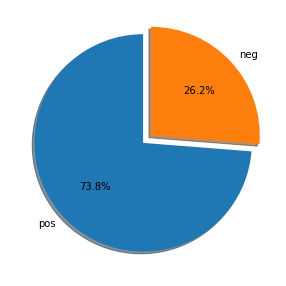

sentiment for watch


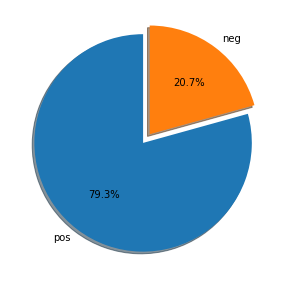

sentiment for laptop


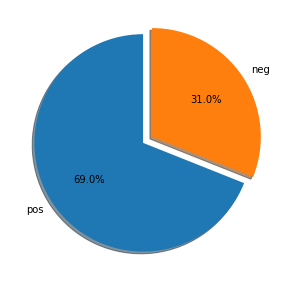

sentiment for shoe


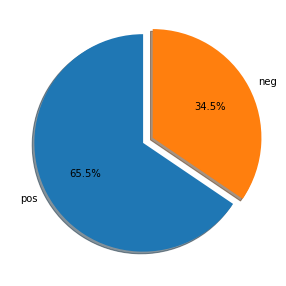

In [46]:
products = ['mobile','watch', 'laptop', 'shoe']

for product in products:
    a = product_sentiment(product)
    
    plt.figure(figsize=(5,5))
    plt.pie(a.values, labels=['pos','neg'],
        explode=(0,0.1), autopct='%1.1f%%',
        shadow=True, startangle=90)

    plt.show()

**we can see for "laptop" 31% customers are unhappy with product or service.**